# ☆ Week03 수업 필기 정리 ☆ 

1. 데이터의 수집
>* 1-1. 데이터베이스 (.db파일)
>* 1-2. 디스크 (.csv파일)
>* 1-3. 웹소스 (url, 패키지 포함 소스)

2. pandas로 데이터 접근, 검색, 점검하기
>* 2-1. 데이터 접근 및 검색
>* 2-2. 데이터 점검
    - ① by 옵션 : 정렬
    - ② inplace 옵션 : 영구적 정렬
    - ③ 영구적 정렬 철회
    
3. seaborn에서의 기본적 플롯
>* 3-1. 스캐터 플롯(scatter plot: 산점도)
>* 3-2. 히스토그램(histogram)
>* 3-3. 조인트 플롯(joint plot)
>* 3-4. 바이올린 플롯(violin plot)
>* 3-5. 페어 플롯(pair plot)

# 1. 데이터의 수집

## 1-1. 데이터베이스 (.db파일)
- 데이터를 컴퓨터 메모리에 적재하는 방식
- RDBMS : 기업이 데이터를 저장하는 가장 흔한 방법
① 직접 질의 : SQL
② pandas 이용하여 dataframe 생성

In [1]:
import sqlite3
sqlite_file = './data/boston.db' 

# connecting to the database file
conn = sqlite3.connect(sqlite_file)

# initialize a cursor obect
cur = conn.cursor()

# define a traversing search
cur.execute("select * from boston limit 5;")

# fetch and print
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


In [2]:
cur.execute("select ZN from boston where ZN > 0.0;")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

In [3]:
import pandas as pd
# get all data inside boston table limited to 5 rows
df = pd.read_sql_query("select * from boston limit 5;", conn)
print("df.shape = " + str(df.shape))

df.shape = (5, 15)


In [4]:
# get all data inside boston table
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
print("Sanity check with Pandas head():")
print(df.head())
print("Summarize with Pandas describe():")
print(df.describe().transpose())

df.shape = (506, 15)
Sanity check with Pandas head():
   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Summarize with Pandas describe():
         count        mean         std        min         25%        50%  \
record   506.0  252.500000  146.213884    0.00000  126.250000  252.50000   
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25

In [5]:
# get all data inside boston table that has ZN values greater 0
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape = " + str(df.shape))
df.head()

df.shape = (134, 15)


,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
2,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
3,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
4,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# same as above with additional filtering in of records greater than 250
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;", conn)
print("df.shape = " + str(df.shape))
df.head()

df.shape = (66, 15)


,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
1,252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53,29.6
2,253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
3,254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
4,255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9


In [7]:
# example of multiline search syntax
df = pd.read_sql_query("""
                       select record, ZN, AGE, TAX from boston
                       where ZN > 0.0 and CRIM < 2.5;
                       """,
                       conn)
print(df.head())

   record    ZN    AGE    TAX
0       0  18.0   65.2  296.0
1       6  12.5   66.6  311.0
2       7  12.5   96.1  311.0
3       8  12.5  100.0  311.0
4       9  12.5   85.9  311.0


cf. **pandas 함수 to_sql()** parameter
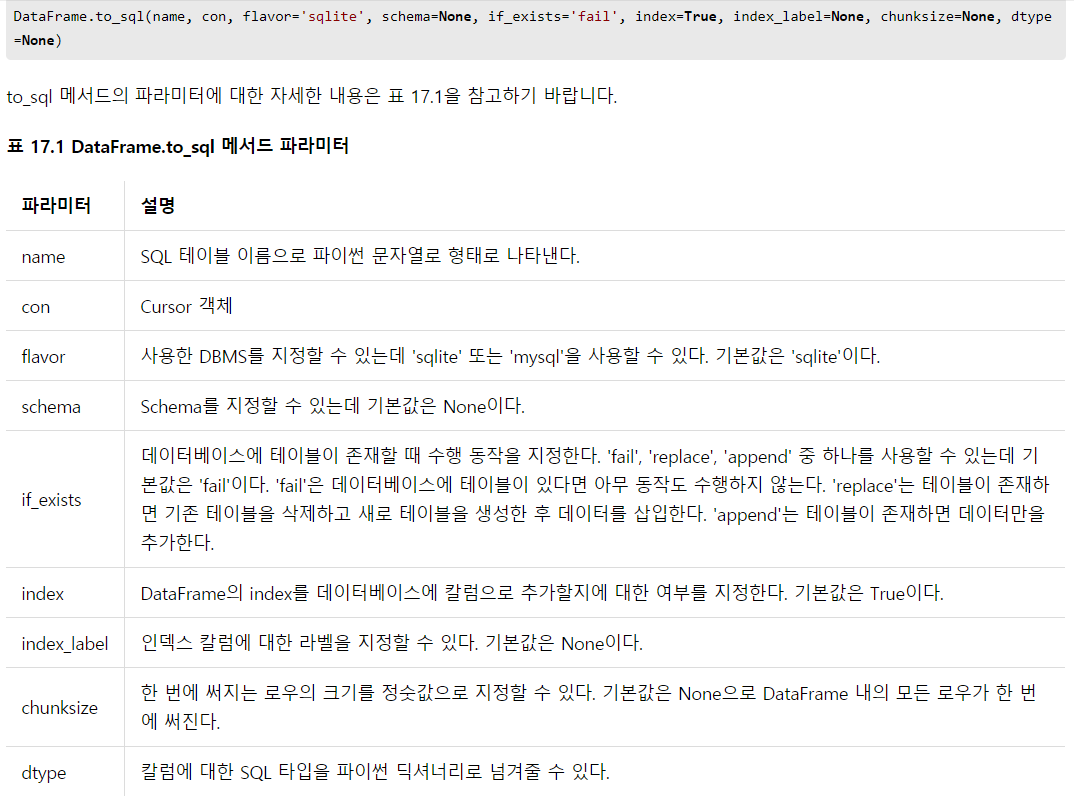

In [8]:
# use Pandas 'to_sql' method to commit changes to connection
df.to_sql("./data/boston_updated", conn, if_exists="replace")
# close connection
conn.close()

## 1-2. 디스크 (.csv파일)

In [9]:
# load from file
df = pd.read_csv("./data/iris.csv")
print(df.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


## 1-3. 웹소스 (url, 패키지 포함 소스)

In [10]:
# load from web URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'species']
df = pd.read_csv(url, names=names)
print(df.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm      species  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


#### Question!
* Error : https 를 사용하면 보안을 위한 인증서, 호스트명 필요
* Solution : ?

In [11]:
# load from Seaborn
import seaborn as sns
df = sns.load_dataset("flights")
print(df.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


# 2. pandas로 데이터 접근, 검색, 점검하기

## 2-1. 데이터 접근 및 검색
#### ① 기본 pandas기법
* head() : 첫 다섯개 행을 열(이름)과 함께 출력 // 데이터의 전체 파악 용이
* shape : 행과 열의 개수 확인
* columns : 데이터프레임의 열(이름) 확인
* describe() : 요약통계량 확인
    - count / mean / std / min / 상자박스 값 / max
* built-in 계산 기법
    - .min() / .max() / .mean() / .median()
* idxmax() : 최댓값을 갖는 인덱스 / idxmin() : 최솟값을 갖는 인덱스



In [12]:
import pandas as pd
import sqlite3
sqlite_file = './data/boston.db' 
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)


df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
df.set_index("record", inplace=True)
conn.close()

df.shape = (506, 15)


In [13]:
# print first 5 rows with column names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# get amount of rows and columns
print(df.shape,"\n")

# get columns in the dataframe
print(df.columns)

(506, 14) 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [15]:
# get statistical summary
df.describe()

# view in transposed form
print(df.describe().transpose())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

In [16]:
# get max and min values
df.max()
df.min()
# get mean and median values
df.mean()
print(df.median())

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64


####  ② 특정 행과 열의 데이터 구하기
* df.loc[0] : index 0 행 값들
* df.loc[2]['CRIM'] : index 2 행의 'CRIM'열 값

In [17]:
# get third row of data (index=2)
print(df.loc[2],"\n")
      
# get first row of CRIM column
print(df.loc[0]['CRIM'])

CRIM         0.02729
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           7.18500
AGE         61.10000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          392.83000
LSTAT        4.03000
MEDV        34.70000
Name: 2, dtype: float64 

0.00632


## 2-2. 데이터 점검
### ① by 옵션 : 정렬
* 기본설정은 내림차순정렬(True)
    - df.sort_values(by='column명', ascending = False)
* 정렬된 view를 제공할 뿐, 실제 데이터는 변화 X

### ② inplace 옵션 : 영구적 정렬
* inplace=True
* 데이터를 영구적으로 정렬

In [18]:
# sort (ascending by default)
df.sort_values(by = 'ZN')
# sort descending
df.sort_values(by = 'ZN', ascending = False)
print(df.sort_values(by = 'ZN', ascending = False).head())

           CRIM     ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                         
57      0.01432  100.0   1.32   0.0  0.4110  6.816  40.5  8.3248  5.0  256.0   
204     0.02009   95.0   2.68   0.0  0.4161  8.034  31.9  5.1180  4.0  224.0   
203     0.03510   95.0   2.68   0.0  0.4161  7.853  33.2  5.1180  4.0  224.0   
200     0.01778   95.0   1.47   0.0  0.4030  7.135  13.9  7.6534  3.0  402.0   
199     0.03150   95.0   1.47   0.0  0.4030  6.975  15.3  7.6534  3.0  402.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
57         15.1  392.90   3.95  31.6  
204        14.7  390.55   2.88  50.0  
203        14.7  392.78   3.81  48.5  
200        17.0  384.30   4.45  32.9  
199        17.0  396.90   4.56  34.9  


In [19]:
# permanently sort the table
df.sort_values(by = 'ZN', inplace=True)
# now call df.head() on permanently sorted table
print(df.head())

            CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
record                                                                         
505      0.04741  0.0  11.93   0.0  0.573  6.030   80.8  2.5050   1.0  273.0   
439      9.39063  0.0  18.10   0.0  0.740  5.627   93.9  1.8172  24.0  666.0   
440     22.05110  0.0  18.10   0.0  0.740  5.818   92.4  1.8662  24.0  666.0   
441      9.72418  0.0  18.10   0.0  0.740  6.406   97.2  2.0651  24.0  666.0   
442      5.66637  0.0  18.10   0.0  0.740  6.219  100.0  2.0048  24.0  666.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
505        21.0  396.90   7.88  11.9  
439        20.2  396.90  22.88  12.8  
440        20.2  391.45  22.11  10.5  
441        20.2  385.96  19.52  17.1  
442        20.2  395.69  16.59  18.4  


### ③ 영구적 정렬 철회
* 원래의 인덱스(여기서는 record) 열에 따라 다시 정렬

In [20]:
# sort back on index
df.sort_values(by = 'record', inplace=True)
print(df.head())

           CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  


In [21]:
# filter dataframe to show only even records
df[df.index % 2 == 0]
# filter dataframe to show only record with AGE greater than 95
df[df['AGE'] > 95]
# get statistical summary of the filtered table
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


**변경된 내용을 df[ ] 안에 담아서 출력해야 함**

# 3. seaborn에서의 기본적 플롯
[seaborn 웹사이트 예제 갤러리](http://seaborn.pydata.org/examples/index.html)

In [22]:
import seaborn as sns 

df = pd.read_csv("./data/iris.csv")

## 3-1. 스캐터 플롯(scatter plot: 산점도)
* 두 변수에 대한 플롯을 사용해서 두 변수 사이의 관계 시각화
* scatterplot() or lmplot() 에서 fit_reg=False
   >fit_reg=True : 회귀직선이 함께 표시됨

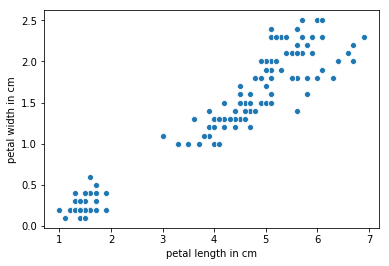

In [23]:
sns.scatterplot(x='petal length in cm', y='petal width in cm', data=df)

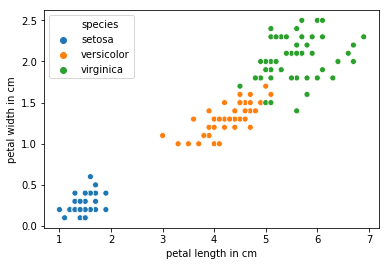

In [24]:
# hue : 'species'를 기준으로 색을 분류함
sns.scatterplot(x='petal length in cm', y='petal width in cm', 
                hue='species', data=df)

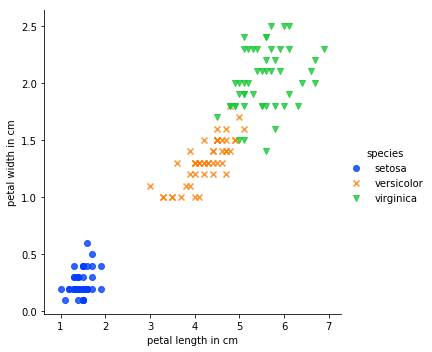

In [25]:
sns.lmplot(x='petal length in cm', y='petal width in cm', 
           hue="species", data=df, fit_reg=False,
           palette='bright',markers=['o','x','v'])

## 3-2. 히스토그램(histogram)
* 빈도 분포 시각화
* 막대 그래프와 비슷하지만 단일 변수이고, y축은 빈도 표시
* distplot()
    >bins: 막대의 개수 지정 (많을수록 세밀한 분포 표현 가능)

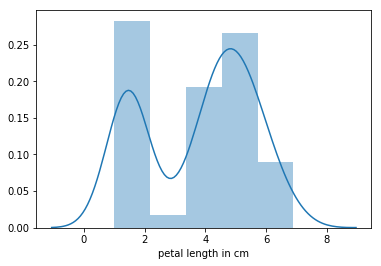

In [26]:
sns.distplot(df['petal length in cm'])

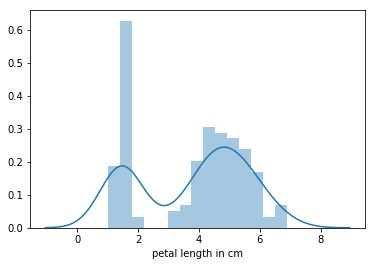

In [27]:
sns.distplot(df['petal length in cm'], bins=15)

## 3-3. 조인트 플롯(joint plot)
* 스캐터 플롯과 히스토그램을 두 개의 변수에 대해서 결합하는 루틴 제공
* jointplot
    >* kind : 플롯의 종류(scatter / reg / resid / kde / hex)
     * marginal_kws : 추가할 플롯의 keyword argument, dicts
     * kde : 커널 밀도 추정치

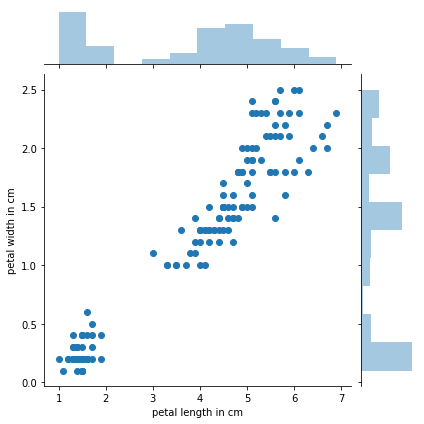

In [28]:
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='scatter', marginal_kws=dict(bins=10))

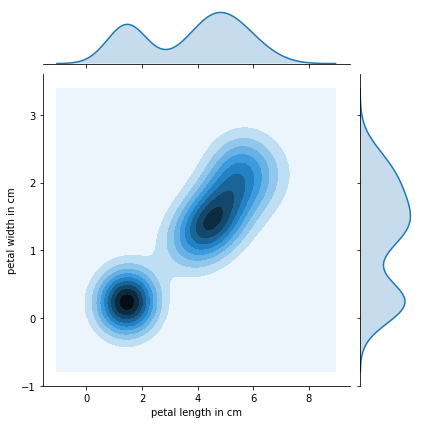

In [29]:
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='kde')

## 3-4. 바이올린 플롯(violin plot)
* 클래스별로 나눠진 단일 변수의 분포를 보여주는 시각화
* 다른 변수에 대해 같은 모양의 바이올린 플롯하면 변숟별로 클래스 구분 정도 알아보기 쉬움
    - 클래스별 구분이 용이함 = 밀도있게 모여있음 
* sns.violinplot()

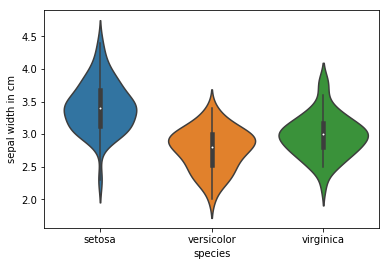

In [30]:
sns.violinplot(x='species',y='sepal width in cm', data=df)

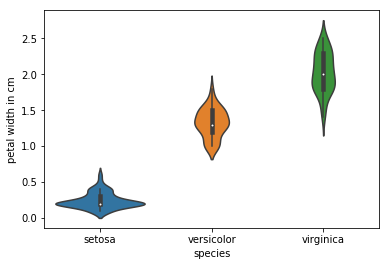

In [31]:
sns.violinplot(x='species',y='petal width in cm', data=df)

## 3-5. 페어 플롯(pair plot)
* 복수의 변수들의 스캐터 플롯을 각각의 조합에 대해 보여줌 (대각선-히스토그램)
* 변수들 간의 관계를 잘 모르는 새로운 데이터 탐구
* sns.pairplot()
    >vars : 플롯할 변수 선택 (모두 표현하기는 너무 많음)

In [32]:
import sqlite3
sqlite_file = './data/boston.db' 
conn = sqlite3.connect(sqlite_file)
df = pd.read_sql_query("select * from boston;", conn)
conn.close()
df.head()

,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


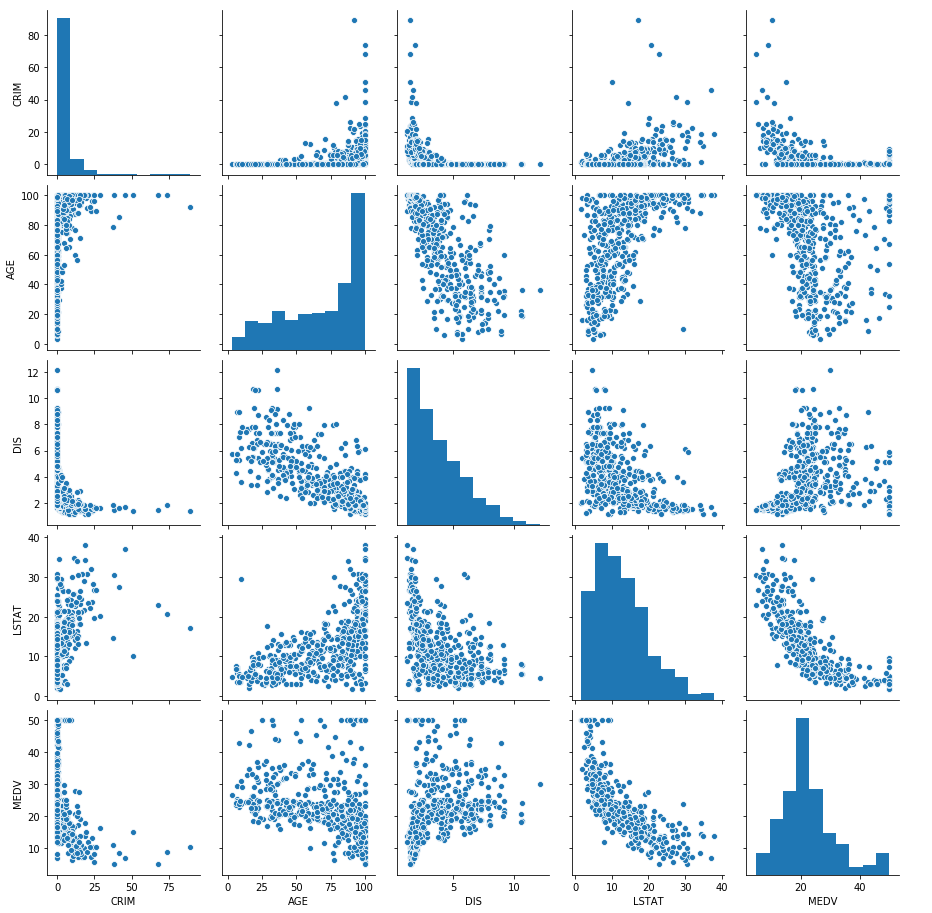

In [33]:
vars_to_plot = ['CRIM', 'AGE', 'DIS', 'LSTAT', 'MEDV']
sns.pairplot(data=df, vars=vars_to_plot)

[출처](https://github.com/PacktPublishing/Python-Data-Mining-Quick-Start-Guide/blob/master/Chapter03/Ch%203%20-%20Collecting%2C%20Exploring%2C%20and%20Visualizing%20Data.ipynb)